In [61]:
#Imports
import matplotlib.pyplot as plt  
import matplotlib
import math as m  
import numpy as np 
import timeit 

matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams.update({'font.size': 22})


In [62]:
#Parameters
Omega=2*np.pi # inverse time units, so when t=1, expect one full flop as that
              # would have an area of 2 pi 
dt = 0.01
tmax = 5
# numpy arrays for time and y ODE set
tlist=np.arange(0.0, tmax, dt) # gauarantees the same step size
npts = len(tlist)
y=np.zeros((npts,3)) # or can introduce arrays to append to
yinit = np.array([0.0,0.0,0.0]) # initial conditions (TLS in ground state)
y1=yinit # just a temp array to pass into solver
y[0,:]= y1

#rk4 parameters
yrk4 = np.zeros((npts,3))
yinitrk4 = np.array([0.0,0.0,0.0])
y1rk4 = yinitrk4
yrk4[0,:] = y1rk4

#gauss parameters
t_p = 1

In [63]:
#functions
"Simple Euler ODE Solver"
def EulerForward(f,y,t,h): # Vectorized forward Euler (so no need to loop) 
# asarray converts to np array - so you can pass lists or numpy arrays
    k1 = h*np.asarray(f(y,t))                     
    y=y+k1
    return y 

"OBEs - with simple CW (harmonic) excitation"
def derivs(y,t): # derivatives function 
    dy=np.zeros((len(y))) 
    #dy = [0] * len(y) # could also use lists here which can be faster if 
                       # using non-vectorized ODE "
    dy[0] = 0.
    dy[1] = Omega/2*(2.*y[2]-1.)
    dy[2] = -Omega*y[1]
    return dy

"OBEs - pulse"
def odederivs(y,t): # derivatives function 
    dy=np.zeros((len(y))) 
    #dy = [0] * len(y) # could also use lists here which can be faster if 
                       # using non-vectorized ODE "
    dy[0] = 0.
    dy[1] = gauss(t)/2*(2.*y[2]-1.)
    dy[2] = -gauss(t)*y[1]
    return dy

def rk4(f, y, t, h):
    k1 = h * (f(y, t))
    k2 = h * (f((y+k1/2), t+h/2))
    k3 = h * (f((y+k2/2), t+h/2))
    k4 = h * (f((y+k3), (t+h)))
    y = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

#gaussian
def gauss(t):
    omega_t = Omega*np.exp**(-t**2/(t_p**2))
    return omega_t

In [64]:
#call function
"Call ODE Solver"
start = timeit.default_timer()  # start timer for solver
for i in range(1,npts):   # loop over time
    y1=EulerForward(derivs,y1,tlist[i-1],dt) 
    y[i,:]= y1

stop = timeit.default_timer()
print ("Time for Euler ODE Solver", stop - start) 

"Exact Solution for excited state population"
yexact = [m.sin(Omega*tlist[i]/2)**2 for i in range(npts)]

for i in range(1,npts):   # loop over time
    y1rk4 = rk4(derivs, y1rk4, tlist[i-1], dt) 
    yrk4[i,:] = y1rk4


Time for Euler ODE Solver 0.006699133999063633


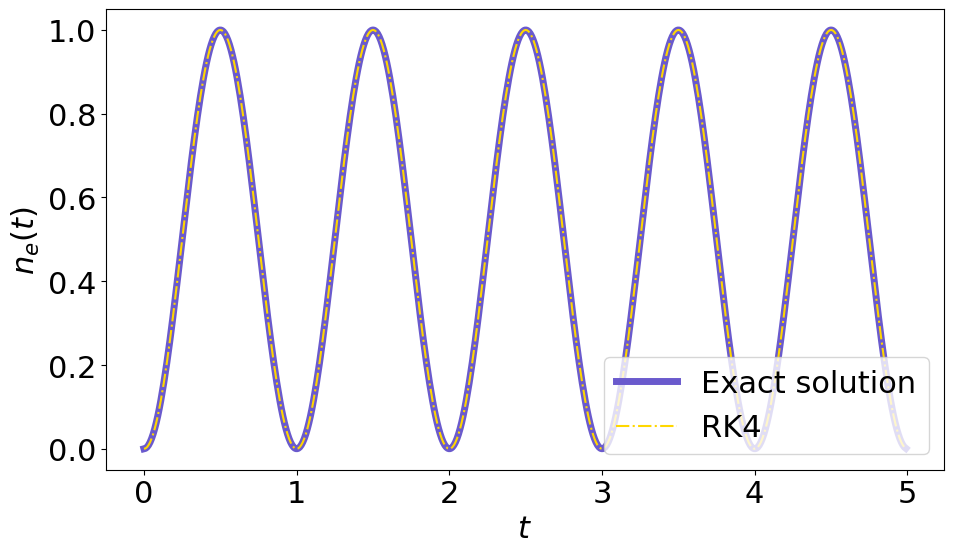

In [87]:
# plot analytic and numerically obtained population n_e(t)
plt.plot(tlist, yexact, color = 'slateblue', linewidth = 5,label = 'Exact solution')
#plt.plot(tlist, y[:,2], color = 'red', label = 'Forward Euler')
plt.plot(tlist, yrk4[:,2], '-.', color = 'gold', label = 'RK4')

plt.legend(loc='lower right')
plt.xlabel('$t$')
plt.ylabel('$n_e(t)$')
plt.tight_layout()
plt.savefig('Q1RK4', dpi=1200, bbox_inches="tight")
